Reading Datas 

In [1]:
DATA_IN_PATH = "C:/Users/user/data_in"

In [2]:
#reading files
def read_file(input_path):
    with open(input_path,"r",encoding="utf-8") as f:
        sentences = []
        labels = []
        for line in f:
            split_line = line.strip().split("\t")
            sentences.append(split_line[0])
            labels.append(split_line[1])
            
        return sentences, labels

In [3]:
import os 

DATA_TRAIN_PATH = os.path.join(DATA_IN_PATH, "train.tsv")
DATA_TEST_PATH = os.path.join(DATA_IN_PATH, "test.tsv")
DATA_LABEL_PATH = os.path.join(DATA_IN_PATH, "label.txt")

In [4]:
train_sentences, train_labels = read_file(DATA_TRAIN_PATH)

In [5]:
print(train_sentences[0])

금석객잔 여러분, 감사드립니다 .


In [6]:
test_sentences, test_labels = read_file(DATA_TEST_PATH)
ner_sentences  = train_sentences + test_sentences
ner_labels = train_labels + test_labels

In [7]:
print(ner_sentences[2])
print(ner_labels[2])

7-8위 결정전에서 김중배 무스파타(샌안토니오)가 참은 법국을 누르고 유럽축구선수권대회 출격권을 점유했다 .
EVT-B EVT-I PER-B PER-I O LOC-B O EVT-B CVL-B O O


In [8]:
print(ner_sentences[0])
print(ner_labels[0])

금석객잔 여러분, 감사드립니다 .
ORG-B O O O


In [9]:
print(ner_sentences[10])
print(ner_labels[10])

서두가 역할의 소하젓은 다름아닌 쿠마리 씨였대요 .
O O CVL-B O PER-B O O


In [10]:
new_ner_sentences = [];

for sentence in ner_sentences:
    string_list = sentence.split()
    new_ner_sentences.append(string_list)

In [11]:
new_ner_labels = [];

for label in ner_labels:
    string_list = label.split()
    new_ner_labels.append(string_list)

In [12]:
print(new_ner_sentences[0])
print(new_ner_labels[0])

['금석객잔', '여러분,', '감사드립니다', '.']
['ORG-B', 'O', 'O', 'O']


EDA

In [13]:
import pandas as pd

ner_dict = {"sentence":ner_sentences, "label":ner_labels}
ner_df = pd.DataFrame(ner_dict)

In [14]:
print('sentence' in ner_df.columns)

True


In [15]:
word_counts = ner_df.apply(lambda x: len(x['sentence'].split(' ')),axis=1)

In [16]:
import numpy as np
print(np.max(word_counts))
print(np.mean(word_counts))
print(np.std(word_counts))

175
11.817455555555556
7.0330805462652854


In [17]:
print(np.median(word_counts))
print(np.percentile(word_counts,25))
print(np.percentile(word_counts,75))
print(np.percentile(word_counts,99))

10.0
7.0
15.0
35.0


In [18]:
#데이터가 오른쪽으로 치우쳐짐

Text(0, 0.5, 'Probability')

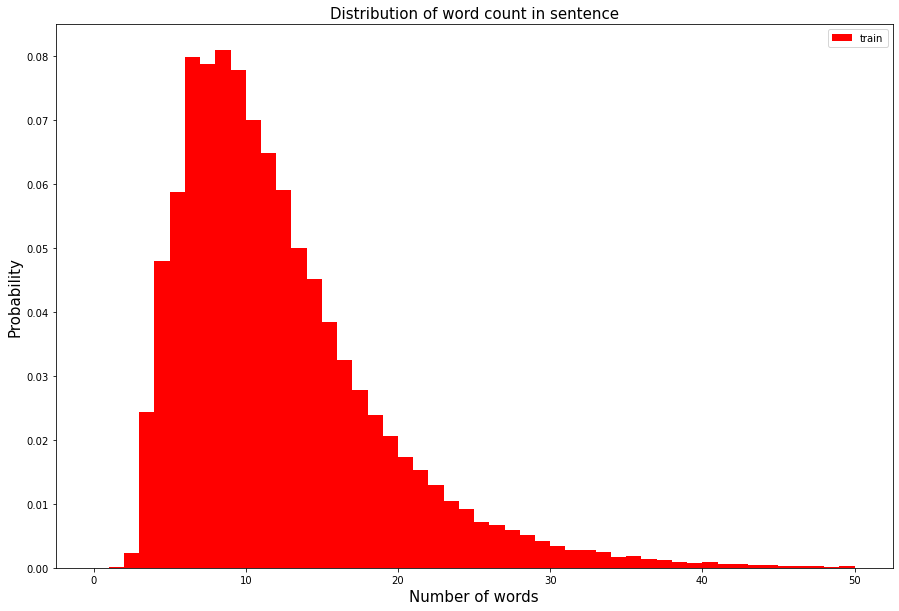

In [19]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.hist(word_counts,bins=50,range=[0,50],facecolor = 'r',density = True, label='train')
plt.title('Distribution of word count in sentence',fontsize = 15)
plt.legend()
plt.xlabel('Number of words',fontsize= 15)
plt.ylabel('Probability',fontsize = 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x1588241eac0>,
 'caps': [<matplotlib.lines.Line2D at 0x15882432160>,
 'boxes': [<matplotlib.lines.Line2D at 0x1588241e7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x15882432640>],
 'fliers': [<matplotlib.lines.Line2D at 0x15882432c10>],
 'means': [<matplotlib.lines.Line2D at 0x15882432910>]}

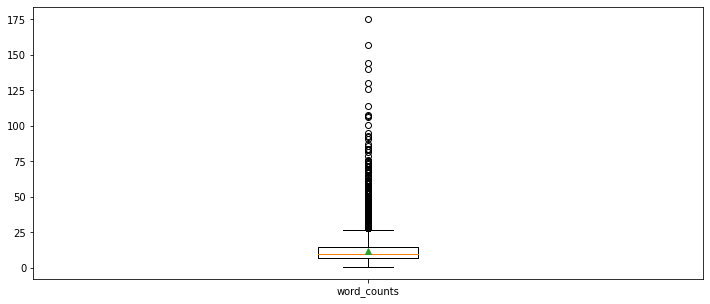

In [20]:
#boxplot : 이상치 확인
plt.figure(figsize=(12,5))
plt.boxplot(word_counts,
           labels=['word_counts'],
           showmeans=True)

Preprocessing

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
#tag tokenizer
tar_tokenizer = Tokenizer(lower=False)
tar_tokenizer.fit_on_texts(new_ner_labels)

In [22]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(new_ner_sentences)

In [23]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 331151
개체명 태깅 정보 집합의 크기 : 30


In [25]:
#정수 인코딩 수행
X_data = src_tokenizer.texts_to_sequences(new_ner_sentences)
y_data = tar_tokenizer.texts_to_sequences(new_ner_labels)

In [26]:
print(X_data[0])
print(y_data[0])

[17738, 1176, 21269, 1]
[5, 1, 1, 1]


In [27]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word

print(index_to_ner)

{1: 'O', 2: 'CVL-B', 3: 'NUM-B', 4: 'PER-B', 5: 'ORG-B', 6: 'DAT-B', 7: 'LOC-B', 8: 'TRM-B', 9: 'EVT-B', 10: 'NUM-I', 11: 'DAT-I', 12: 'ANM-B', 13: 'EVT-I', 14: 'PER-I', 15: 'ORG-I', 16: 'AFW-B', 17: 'CVL-I', 18: 'TRM-I', 19: 'TIM-B', 20: 'FLD-B', 21: 'AFW-I', 22: 'TIM-I', 23: 'PLT-B', 24: 'MAT-B', 25: 'LOC-I', 26: 'ANM-I', 27: 'FLD-I', 28: 'MAT-I', 29: 'PLT-I'}


In [51]:
print(word_to_index['금석객잔'])

17738


In [28]:
#padding 진행
from tensorflow.keras.preprocessing.sequence import pad_sequences


max_len = 8
X_data = pad_sequences(X_data,padding='post',maxlen = max_len)
y_data = pad_sequences(y_data,padding='post',maxlen = max_len)

In [29]:
#split data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_int, y_test_int = train_test_split(X_data,y_data,test_size = 0.2, 
                                                   random_state = 777)

In [30]:
#레이블에 해당하는 태깅 정보에 대한 원-핫 인코딩 수행
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train_int,num_classes=tag_size)
y_test = to_categorical(y_test_int,num_classes=tag_size)

In [31]:
print('훈련 샘플 문장 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블 크기 : {}'.format(y_test.shape))

훈련 샘플 문장 크기 : (72000, 8)
훈련 샘플 레이블 크기 : (72000, 8, 30)
테스트 샘플 문장 크기 : (18000, 8)
테스트 샘플 레이블 크기 : (18000, 8, 30)


Bi-directional LSTM

In [32]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,LSTM, Bidirectional, TimeDistributed, Embedding
from tensorflow.keras.optimizers import Adam

dimension of embedding vector : 128
size of hidden layer : 128
TimeDistributed : many-to-many LSTM 
activation function : softmax regression
loss function : entropy function 
batch_size : 128
epoch : 8

In [33]:
word_vocab = src_tokenizer.word_index 

In [34]:
print(len(word_vocab))

331150


BiLSTM 

In [33]:
embedding_dim = 128
hidden_units = 128

vocab_size = len(word_vocab)+1

model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length = max_len, mask_zero=True))
model.add(Bidirectional(LSTM(hidden_units, return_sequences = True)))
model.add(TimeDistributed(Dense(tag_size,activation='softmax')))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

model.fit(X_train,y_train,batch_size=128,epochs = 8, validation_data = (X_test,y_test))

Epoch 1/8
563/563 [==============================] - 247s 422ms/step - loss: 1.4432 - accuracy: 0.7482 - val_loss: 0.9949 - val_accuracy: 0.7593
Epoch 2/8
563/563 [==============================] - 240s 427ms/step - loss: 0.9513 - accuracy: 0.7577 - val_loss: 0.9274 - val_accuracy: 0.7593
Epoch 3/8
563/563 [==============================] - 243s 432ms/step - loss: 0.8602 - accuracy: 0.7584 - val_loss: 0.8506 - val_accuracy: 0.7620
Epoch 4/8
563/563 [==============================] - 244s 433ms/step - loss: 0.7449 - accuracy: 0.7683 - val_loss: 0.7767 - val_accuracy: 0.7745
Epoch 5/8
563/563 [==============================] - 245s 434ms/step - loss: 0.6314 - accuracy: 0.7938 - val_loss: 0.7382 - val_accuracy: 0.7843
Epoch 6/8
563/563 [==============================] - 245s 435ms/step - loss: 0.5506 - accuracy: 0.8233 - val_loss: 0.7181 - val_accuracy: 0.7926
Epoch 7/8
563/563 [==============================] - 245s 435ms/step - loss: 0.4881 - accuracy: 0.8492 - val_loss: 0.7180 - val_ac

In [34]:
print('테스트 정확도 : %.4f' %(model.evaluate(X_test,y_test)[1]))

563/563 [==============================] - 4s 6ms/step - loss: 0.7257 - accuracy: 0.7958
테스트 정확도 : 0.7958


In [37]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

In [38]:
i = 10 # 확인하고 싶은 테스트용 샘플의 인덱스.

# 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = model.predict(np.array([X_test[i]]))

# 확률 벡터를 정수 레이블로 변경.
y_predicted = np.argmax(y_predicted, axis=-1)

# 원-핫 벡터를 정수 인코딩으로 변경.
labels = np.argmax(y_test[i], -1)

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
보살핌은             : CVL-B   CVL-B
연전연승에            : O       O
의의를              : O       O
크게               : O       O
두지               : O       O
않았다              : O       O
.                : O       O


BiLSTM-CRF

CRF 층을 추가하게 되면 모델은 예측 개체명, 즉 레이블 사이의 의존성을 고려할 수 있게 됨

In [35]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, LSTM, Input, Bidirectional, TimeDistributed, Embedding, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras_crf import CRFModel
from seqeval.metrics import f1_score, classification_report

In [36]:
embedding_dim = 128
hidden_units = 64
dropout_ratio = 0.3

sequence_input = Input(shape=(max_len,),dtype=tf.int32, name='sequence_input')

model_embedding = Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=max_len)(sequence_input)

model_bilstm = Bidirectional(LSTM(units=hidden_units, return_sequences=True))(model_embedding)

model_dropout = TimeDistributed(Dropout(dropout_ratio))(model_bilstm)

model_dense = TimeDistributed(Dense(tag_size, activation='relu'))(model_dropout)

base = Model(inputs=sequence_input, outputs=model_dense)
model = CRFModel(base, tag_size)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), metrics='accuracy')

In [37]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('bilstm_crf/cp.ckpt', monitor='val_decode_sequence_accuracy', mode='max', verbose=1, save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train_int, batch_size=128, epochs=15, validation_split=0.1, callbacks=[mc, es])

Epoch 1/15
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
507/507 [==============================] - 250s 468ms/step - decode_sequence_accuracy: 0.7776 - loss: 7.8704 - val_decode_sequence_accuracy: 0.8115 - val_loss: 6.9992

Epoch 00001: val_decode_sequence_accuracy improved from -inf to 0.81146, saving model to bilstm_crf\cp.ckpt
Epoch 2/15
507/507 [==============================] - 245s 484ms/step - decode_sequence_accuracy: 0.8583 - loss: 3.8557 - val_decode_sequence_accuracy: 0.8399 - val_loss: 5.8243

Epoch 00002: val_decode_sequence_accuracy improved from 0.81146 to 0.83993, saving model to bilstm_crf\cp.ckpt
Epoch 3/15
507/507 [==============================] - 258s 509ms/step - decode_sequence_accuracy: 0.9261 - loss: 1.8524 - val_decode_sequence_accuracy: 0.8293 - val_loss: 6.6375

Epoch 00003: val_decode_sequence_accuracy did not improve from 0.83993
Epoch 4/15
507/507 [===============

In [38]:
model.load_weights('bilstm_crf/cp.ckpt')

i = 13 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]]))[0] # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
labels = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for word, tag, pred in zip(X_test[i], labels, y_predicted[0]):
    if word != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[word], index_to_ner[tag], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
섀넌에게             : PER-B   PER-B
결승전              : EVT-B   EVT-B
독창               : NUM-B   O
홈런을              : O       O
맞고               : O       O
4-2로             : NUM-B   O
졌다               : O       O
.                : O       O


In [39]:
y_predicted = model.predict(X_test)[0]

In [40]:
print(y_predicted[:2])

[[ 4  8  1  1  1  6  0  0]
 [ 5  9  9 13  3  1  1  1]]


In [44]:
index_to_ner[0] = "PAD"

In [45]:
index_to_ner

{1: 'O',
 2: 'CVL-B',
 3: 'NUM-B',
 4: 'PER-B',
 5: 'ORG-B',
 6: 'DAT-B',
 7: 'LOC-B',
 8: 'TRM-B',
 9: 'EVT-B',
 10: 'NUM-I',
 11: 'DAT-I',
 12: 'ANM-B',
 13: 'EVT-I',
 14: 'PER-I',
 15: 'ORG-I',
 16: 'AFW-B',
 17: 'CVL-I',
 18: 'TRM-I',
 19: 'TIM-B',
 20: 'FLD-B',
 21: 'AFW-I',
 22: 'TIM-I',
 23: 'PLT-B',
 24: 'MAT-B',
 25: 'LOC-I',
 26: 'ANM-I',
 27: 'FLD-I',
 28: 'MAT-I',
 29: 'PLT-I',
 0: 'PAD'}

In [47]:
from seqeval.metrics import f1_score, classification_report

def sequences_to_tag(sequences):
    result = []
    # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
    for sequence in sequences:
        word_sequence = []
        # 시퀀스로부터 확률 벡터 또는 원-핫 벡터를 하나씩 꺼낸다.
        for pred in sequence:
            # 정수로 변환. 예를 들어 pred가 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            pred_index = np.argmax(pred)            
            # index_to_ner을 사용하여 정수를 태깅 정보로 변환. 'PAD'는 'O'로 변경.
            word_sequence.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(word_sequence)
    return result

In [48]:
def sequences_to_tag_for_crf(sequences): 
    result = []
    # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
    for sequence in sequences: 
        word_sequence = []
        # 시퀀스로부터 예측 정수 레이블을 하나씩 꺼낸다.
        for pred_index in sequence:
            # index_to_ner을 사용하여 정수를 태깅 정보로 변환. 'PAD'는 'O'로 변경.
            word_sequence.append(index_to_ner[pred_index].replace("PAD", "O"))
        result.append(word_sequence)
    return result

pred_tags = sequences_to_tag_for_crf(y_predicted)
test_tags = sequences_to_tag(y_test)

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))
print(classification_report(test_tags, pred_tags))

C:\Users\user\anaconda3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: PER-B seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\user\anaconda3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: TRM-B seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\user\anaconda3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: DAT-B seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\user\anaconda3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: ORG-B seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\user\anaconda3\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: EVT-I seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
C:\Users\user\anaconda3\lib\site-packages\seqeval\metrics\sequenc

F1-score: 41.9%
              precision    recall  f1-score   support

           B       0.54      0.35      0.43     17815
           I       0.68      0.26      0.37      3031

   micro avg       0.55      0.34      0.42     20846
   macro avg       0.61      0.30      0.40     20846
weighted avg       0.56      0.34      0.42     20846

